In [2]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer


In [3]:
df = pd.read_csv("../data/raw/train.csv")

In [ ]:
import contractions
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import names
from textacy import preprocessing
import string

nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('names', quiet=True)

lemmatizer = WordNetLemmatizer()
stops = set(stopwords.words("english"))
stops.remove("not")
stops.remove("won")

human_names = set(names.words("male.txt") + names.words("female.txt"))
human_names.remove("Happy")

def preprocess(text):
    text = preprocessing.replace.urls(text, "")
    text = preprocessing.remove.html_tags(text)
    
    # Remove username handles
    text = re.sub(r"@[^\s]+", "", text)
    text = re.sub(r"_[^\s]+", "", text)
    
    text = preprocessing.normalize.quotation_marks(text)
    
    # Resolve contractions & slangs
    text = contractions.fix(text, slang=True)
    
    # Emoticons
    # TODO: censored curse words ****
    text = re.sub(r"<3+", " love", text)
    
    text = preprocessing.replace.numbers(text, "")

    text = text.translate(str.maketrans({key: " " for key in string.punctuation}))
    # text = preprocessing.remove.punctuation(text)
    text = preprocessing.normalize.whitespace(text)
    
    # TODO: filter out names & certain stopwords
    # TODO: ugly to tokenize in the preprocess fn..
    tokens = word_tokenize(text)
    # tokens = [token for token in tokens if token not in human_names]
    tokens = [token for token in tokens if token.lower() not in stops]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    text = " ".join(tokens)
    
    text = text.lower()
    return text
preprocess("wouldnt")

'would not'

In [5]:
df["preproc_text"] = df["text"].apply(preprocess)

In [10]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [11]:
for row in df.sample(10).itertuples():
    print(row.text)
    print(row.preproc_text)
    print("===========")

WOOT! favourtie, well second favourite episode just came on TOW ross and rachel ... you know
woot favourtie well second favourite episode came tow ross rachel know
has just received a phone call for new patients...i guess that means work for tomorrow!
received phone call new patient guess mean work tomorrow
_Brody What is BF ? Is it a glue ?
bf glue
omg i just slept like 18hrs in the last 22hrs...  i think i`m dying or something   reminds me of catcher
omg slept like 18hrs last 22hrs think dying something reminds catcher
 Naw forget it then. I will only if u take them
naw forget take
Saw the new Star Trek movie yesterday `twas  very good. Having a quiet day today - off to the gym then for lunch
saw new star trek movie yesterday good quiet day today gym lunch
 The little weeping nervous girl was put through... along with a 12 yr old quite good dancing boy. Greg the lovely singer came 3rd
little weeping nervous girl put along yr old quite good dancing boy greg lovely singer came 3rd
Alri

In [6]:
tfidf_vectorizer = TfidfVectorizer(min_df=5)
tfidf_word_doc_matrix = tfidf_vectorizer.fit_transform(df["preproc_text"])

In [7]:
tfidf_word_doc_matrix.shape

(24732, 3674)

/opt/conda/lib/python3.8/site-packages/umap/umap_.py:125: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 10962 edges.
It has only fully disconnected 419 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


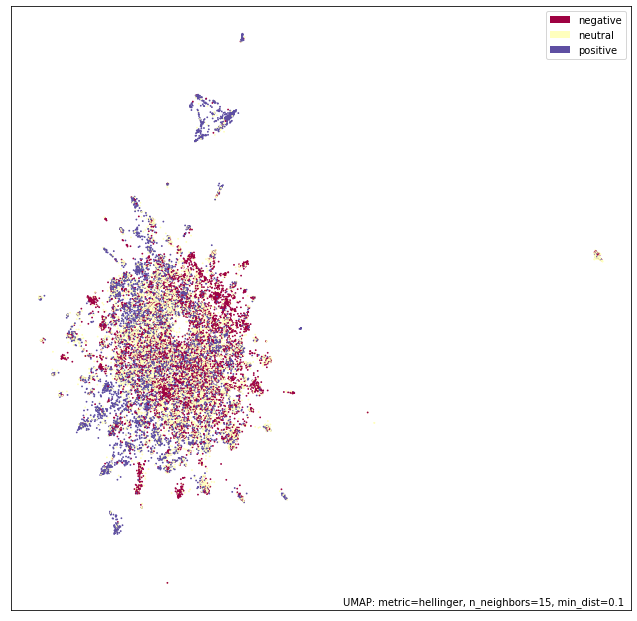

In [30]:
import umap
import umap.plot
import matplotlib.pyplot as plt

tfidf_embedding = umap.UMAP(metric='hellinger' ).fit(tfidf_word_doc_matrix)

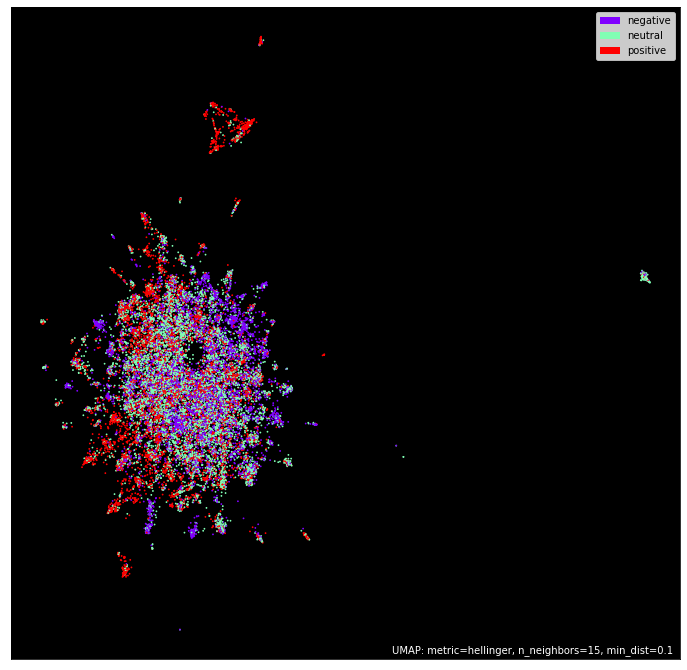

In [56]:
fig, ax = plt.subplots(figsize=(12, 12))
fig = umap.plot.points(tfidf_embedding, labels=df["sentiment"], background="black", alpha=1.0, ax=ax, theme="fire") 
# fig = umap.plot.points(tfidf_embedding[df["sentiment"] == "positive"], background="black", alpha=1.0) 
# tfidf_embedding.

In [28]:
import umap.plot
import matplotlib.pyplot as plt

tfidf_embedding = umap.UMAP(metric='euclidean', verbose=10).fit(X)

UMAP( verbose=10)
Wed Jun  8 14:12:43 2022 Construct fuzzy simplicial set
Wed Jun  8 14:12:43 2022 Finding Nearest Neighbors
Wed Jun  8 14:12:43 2022 Building RP forest with 13 trees
Wed Jun  8 14:12:43 2022 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	 5  /  15
	 6  /  15
	Stopping threshold met -- exiting after 6 iterations
Wed Jun  8 14:12:49 2022 Finished Nearest Neighbor Search
Wed Jun  8 14:12:49 2022 Construct embedding



Wed Jun  8 14:13:11 2022 Finished embedding


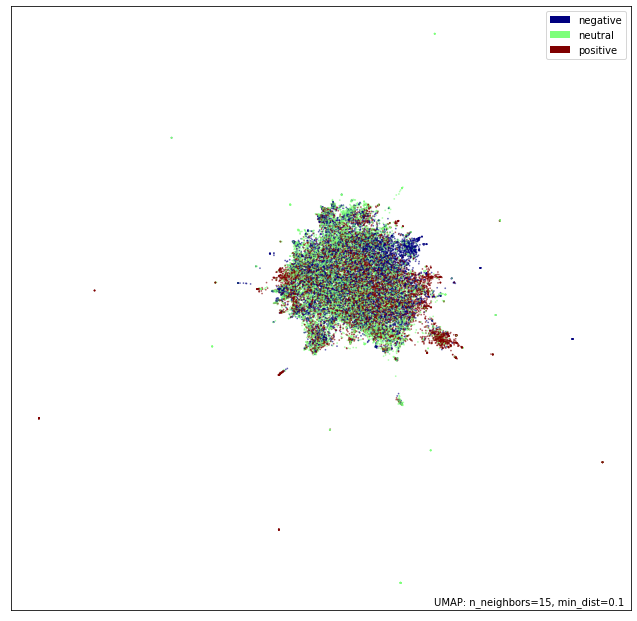

In [29]:
fig = umap.plot.points(tfidf_embedding, labels=df["sentiment"], color_key_cmap="jet", alpha=0.5)